In [3]:
import os
import pickle
import sys

sys.path.append(os.path.join(".."))

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pytorch_lightning as pl
import seaborn as sns
import torch
from src.model_utils import (
    Crop_LSTM,
    Crop_MLP,
    Crop_PL,
    custom_multiclass_report,
)
from sklearn.metrics import classification_report, confusion_matrix
from torch import nn
from torch.utils.data import DataLoader
from tqdm import tqdm

##  Data

In [4]:
# Read dictionary pkl file
with open(os.path.join("..", "data", "processed_files", "pkls", "X_down_lstm.pkl"), "rb") as fp:
    X_lstm = pickle.load(fp)

with open(os.path.join("..", "data", "processed_files", "pkls", "X_down.pkl"), "rb") as fp:
    X = pickle.load(fp)

with open(os.path.join("..", "data", "processed_files", "pkls", "y_down_lstm.pkl"), "rb") as fp:
    y = pickle.load(fp)

with open(os.path.join("..", "data", "npys_data", "keys.pkl"), "rb") as fp:
    keys = pickle.load(fp)

In [5]:
X_test = X["Test"]
X_test_t = torch.tensor(X["Test"], dtype=torch.float)
X_lstm = torch.tensor(X_lstm["Test"], dtype=torch.float)
y_test = np.argmax(y["Test"], 1)
X_val = pd.DataFrame(X["Val"], columns=keys)
y_val = y["Val"]

del X, y

## Testing models on the same test data

In [6]:
path_to_pickled_models = os.path.join("..", "results", "pickle_models")

clf_dict = {
    "lr": os.path.join(path_to_pickled_models, "Logistic_Regression_crops_final.pkl"),
    "xgbt": os.path.join(path_to_pickled_models, "XGBoost_crops_final.pkl"),
    "lgbm": os.path.join(path_to_pickled_models, "LightGBM_crops_final.pkl"),
}

clf_nn_dict = {
    "MLP": os.path.join(path_to_pickled_models, "Crop_MLP.ckpt"),
    "lstm": os.path.join(path_to_pickled_models, "Crop_LSTM.ckpt"),
}

### Calculate metrics for all models in a sequence

  0%|          | 0/5 [00:00<?, ?it/s]

lr results:
              precision    recall  f1-score   support

           0       0.76      0.73      0.75    249306
           1       0.68      0.18      0.28     31174
           2       0.44      0.38      0.41    124554
           3       0.66      0.78      0.72    249306

    accuracy                           0.66    654340
   macro avg       0.63      0.52      0.54    654340
weighted avg       0.66      0.66      0.65    654340



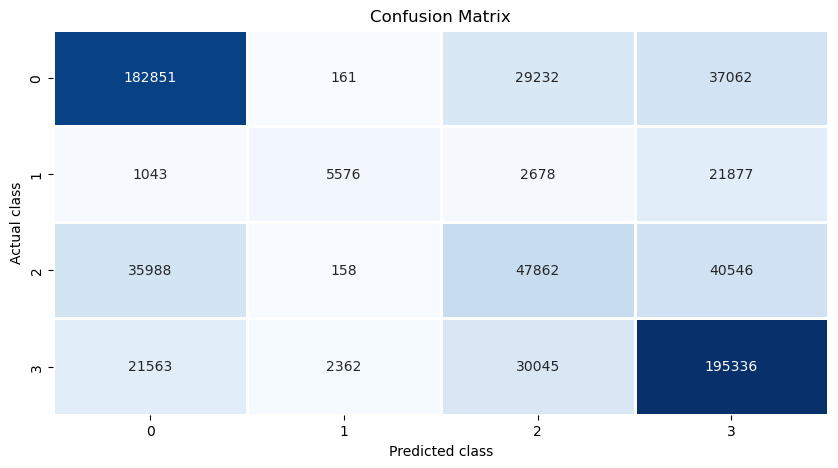

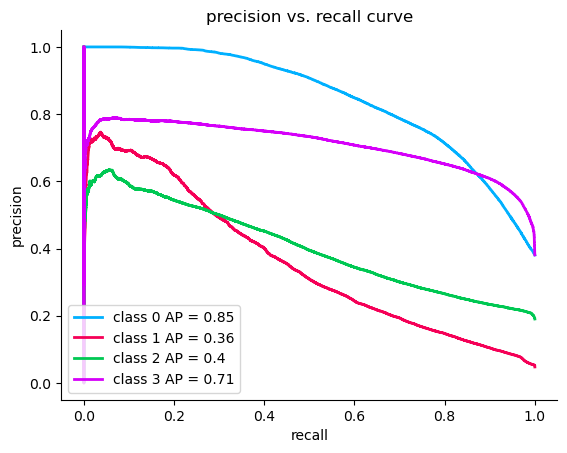

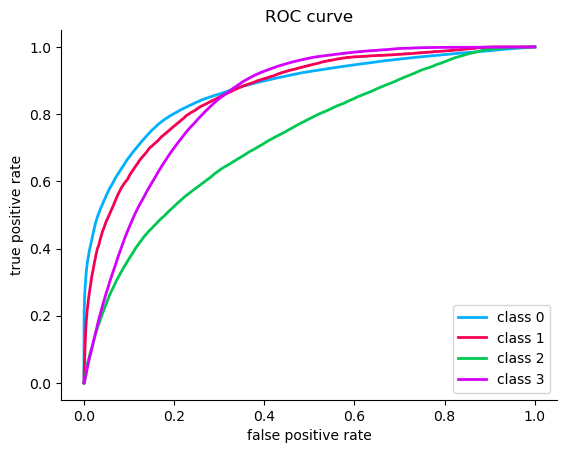

0 ROC AUC OvR: 0.8750
1 ROC AUC OvR: 0.8677
2 ROC AUC OvR: 0.7280
3 ROC AUC OvR: 0.8428
average ROC AUC OvR: 0.8284


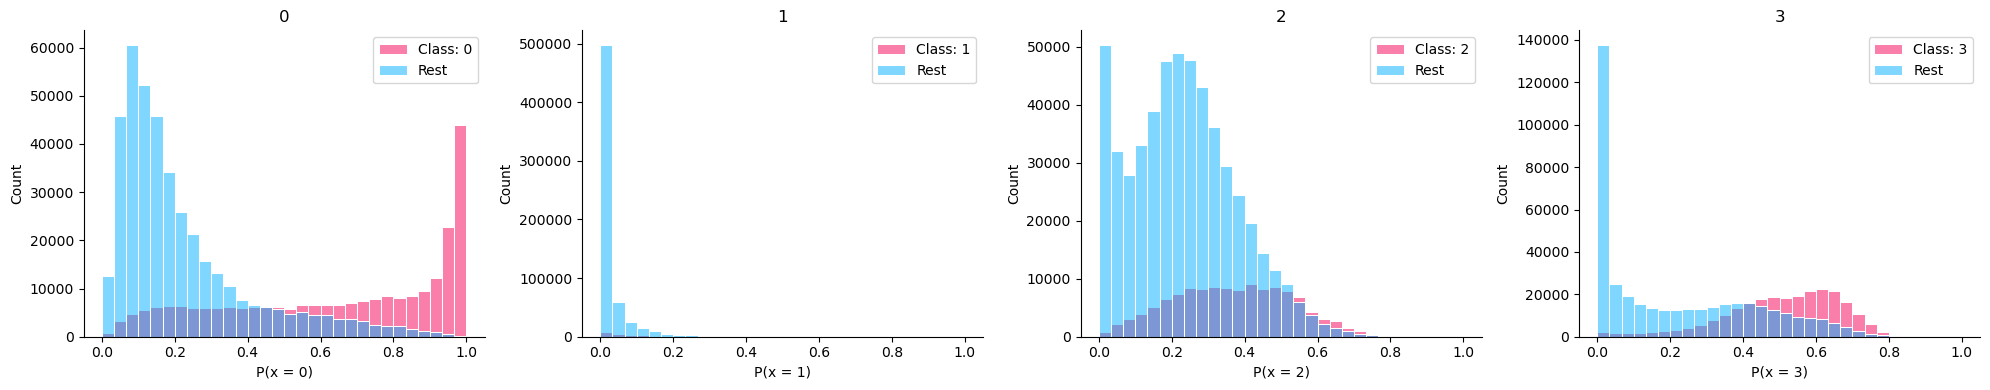

0 vs 1 ROC AUC OvO: 0.9416
1 vs 0 ROC AUC OvO: 0.9414
0 vs 2 ROC AUC OvO: 0.8077
2 vs 0 ROC AUC OvO: 0.7717
0 vs 3 ROC AUC OvO: 0.9003
3 vs 0 ROC AUC OvO: 0.8991
1 vs 2 ROC AUC OvO: 0.8646
2 vs 1 ROC AUC OvO: 0.7117
1 vs 3 ROC AUC OvO: 0.7957
3 vs 1 ROC AUC OvO: 0.6266
2 vs 3 ROC AUC OvO: 0.6864
3 vs 2 ROC AUC OvO: 0.7843
average ROC AUC OvO: 0.8109


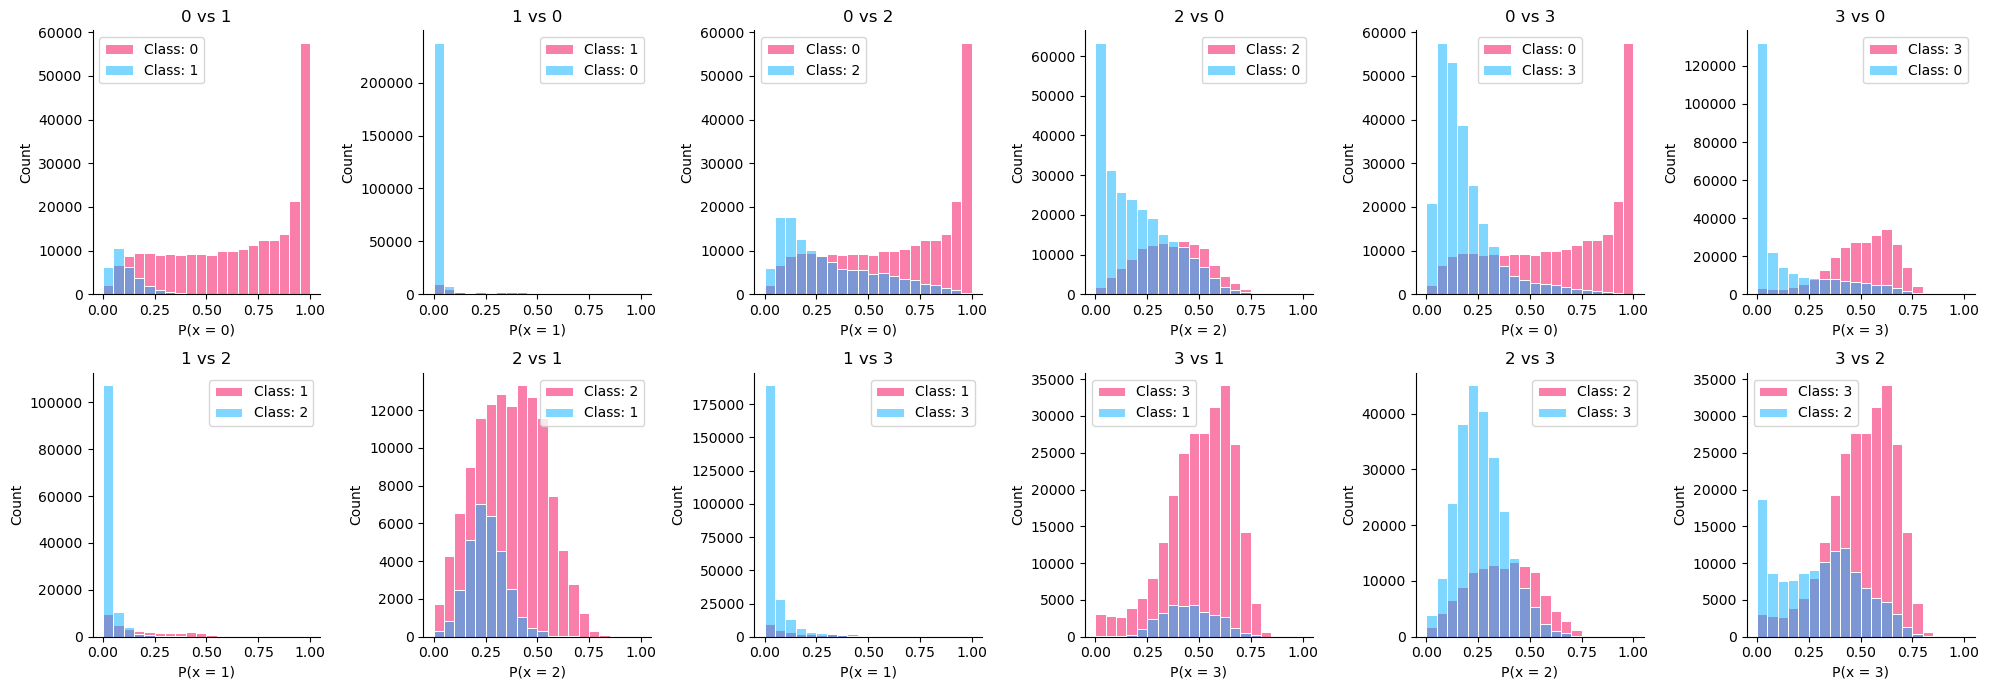

 20%|██        | 1/5 [00:26<01:47, 26.95s/it]

xgbt results:
              precision    recall  f1-score   support

           0       0.88      0.88      0.88    249306
           1       0.77      0.37      0.50     31174
           2       0.72      0.66      0.69    124554
           3       0.76      0.85      0.81    249306

    accuracy                           0.80    654340
   macro avg       0.78      0.69      0.72    654340
weighted avg       0.80      0.80      0.80    654340



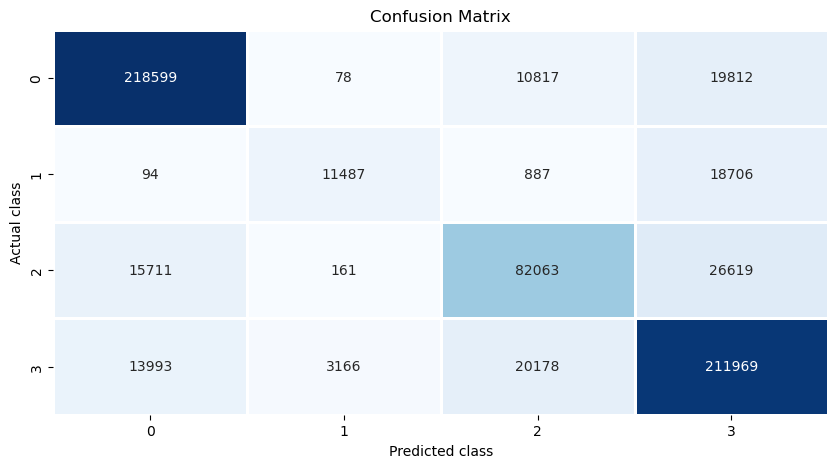

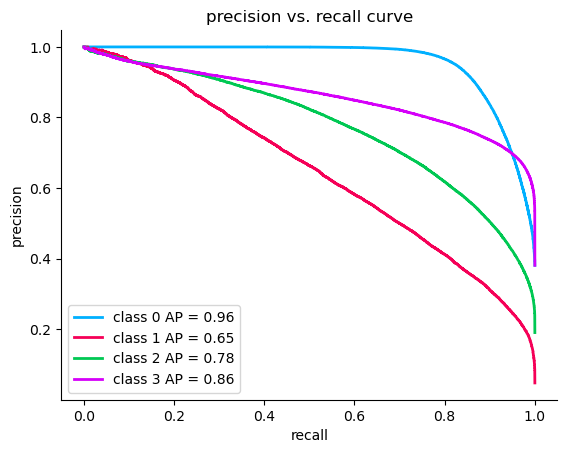

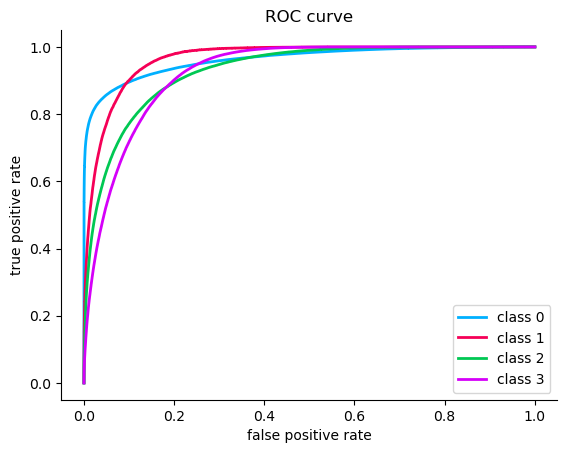

0 ROC AUC OvR: 0.9625
1 ROC AUC OvR: 0.9651
2 ROC AUC OvR: 0.9291
3 ROC AUC OvR: 0.9242
average ROC AUC OvR: 0.9452


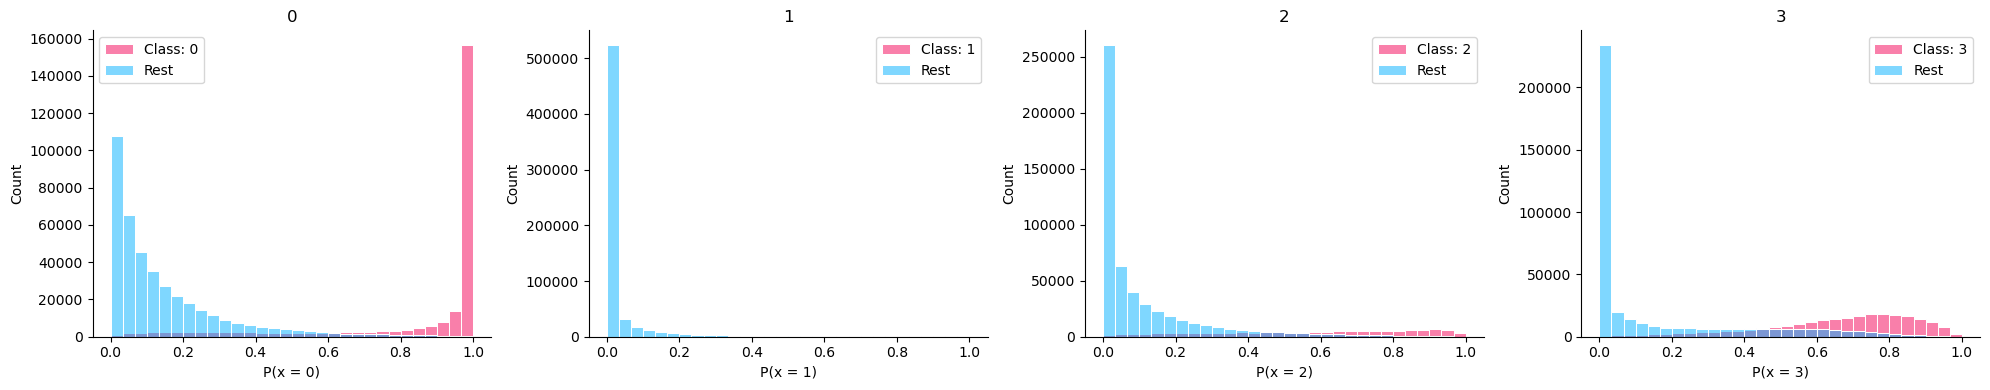

0 vs 1 ROC AUC OvO: 0.9926
1 vs 0 ROC AUC OvO: 0.9964
0 vs 2 ROC AUC OvO: 0.9493
2 vs 0 ROC AUC OvO: 0.9515
0 vs 3 ROC AUC OvO: 0.9654
3 vs 0 ROC AUC OvO: 0.9609
1 vs 2 ROC AUC OvO: 0.9831
2 vs 1 ROC AUC OvO: 0.9562
1 vs 3 ROC AUC OvO: 0.9249
3 vs 1 ROC AUC OvO: 0.7262
2 vs 3 ROC AUC OvO: 0.9033
3 vs 2 ROC AUC OvO: 0.9002
average ROC AUC OvO: 0.9342


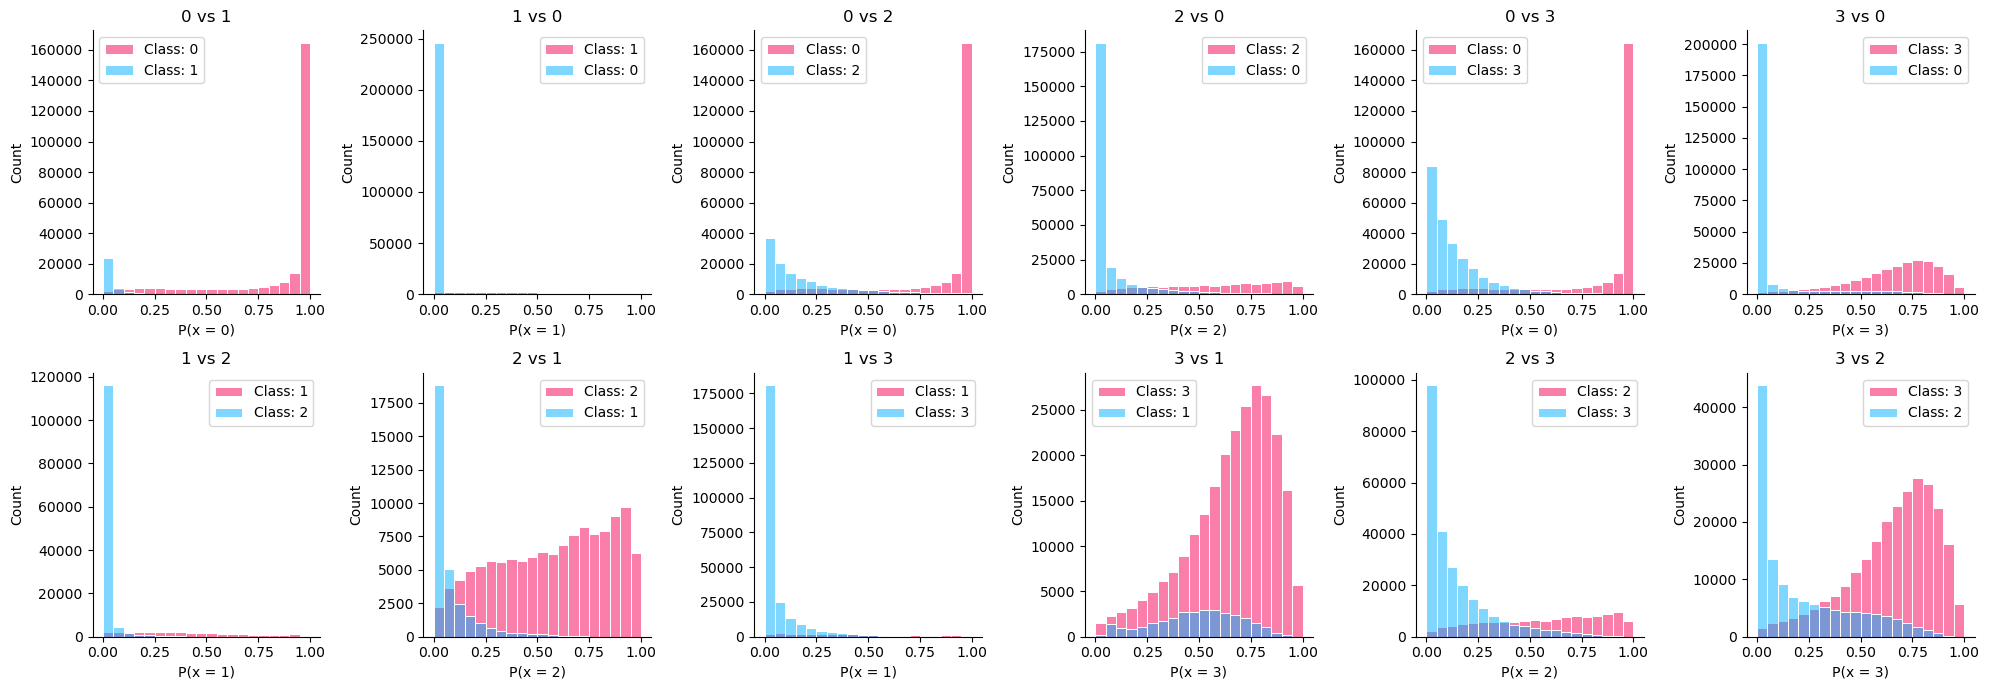

 40%|████      | 2/5 [09:09<15:55, 318.49s/it]

lgbm results:
              precision    recall  f1-score   support

           0       0.89      0.84      0.86    249306
           1       0.71      0.34      0.46     31174
           2       0.71      0.56      0.63    124554
           3       0.72      0.88      0.79    249306

    accuracy                           0.78    654340
   macro avg       0.76      0.66      0.69    654340
weighted avg       0.78      0.78      0.77    654340



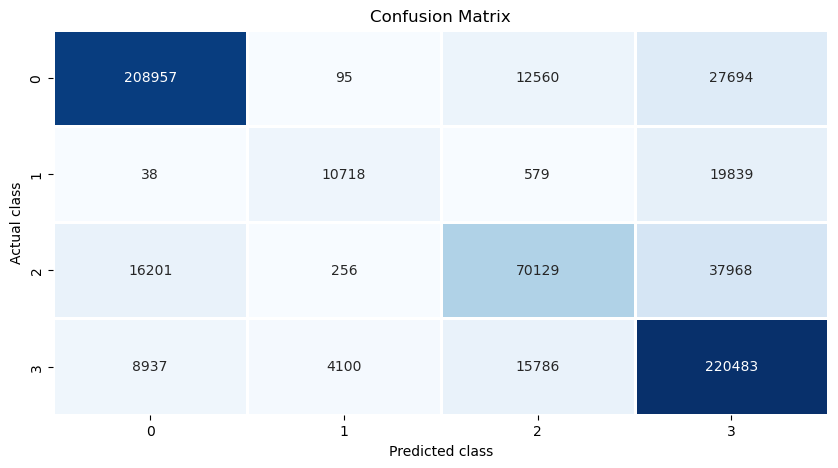

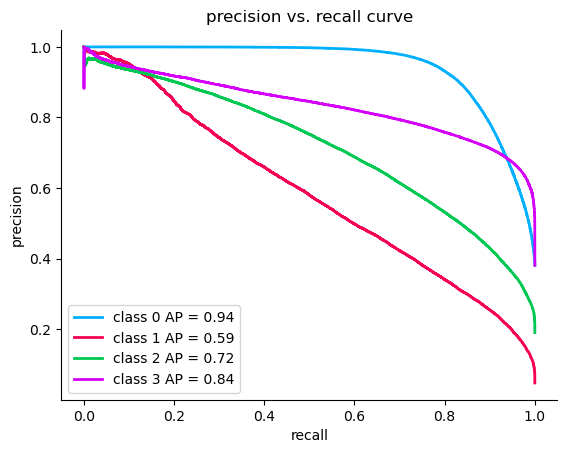

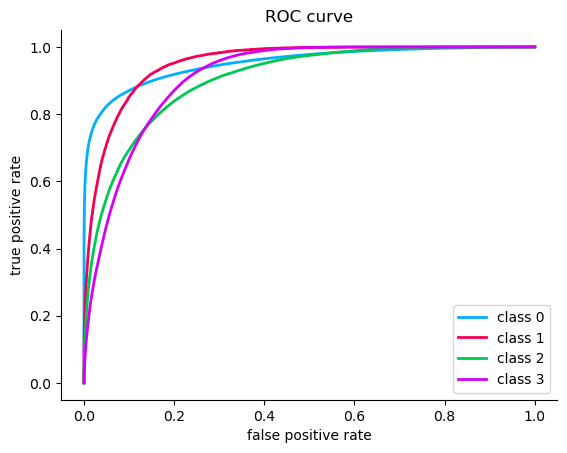

0 ROC AUC OvR: 0.9520
1 ROC AUC OvR: 0.9526
2 ROC AUC OvR: 0.9033
3 ROC AUC OvR: 0.9111
average ROC AUC OvR: 0.9298


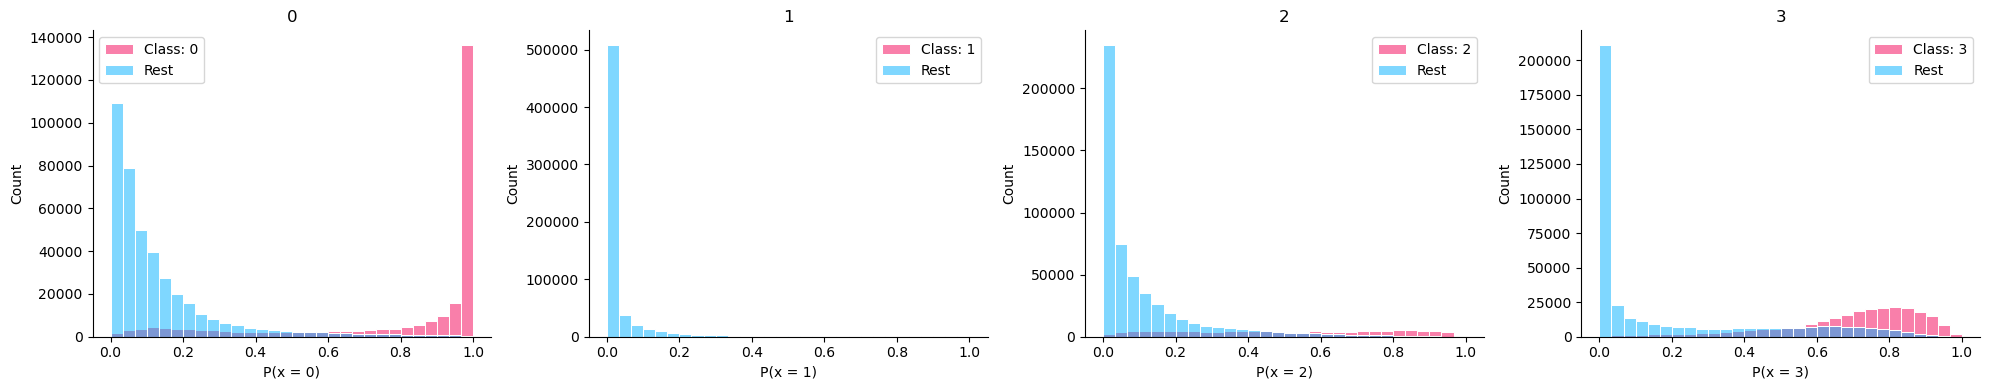

0 vs 1 ROC AUC OvO: 0.9906
1 vs 0 ROC AUC OvO: 0.9939
0 vs 2 ROC AUC OvO: 0.9266
2 vs 0 ROC AUC OvO: 0.9219
0 vs 3 ROC AUC OvO: 0.9600
3 vs 0 ROC AUC OvO: 0.9492
1 vs 2 ROC AUC OvO: 0.9710
2 vs 1 ROC AUC OvO: 0.9433
1 vs 3 ROC AUC OvO: 0.9021
3 vs 1 ROC AUC OvO: 0.7368
2 vs 3 ROC AUC OvO: 0.8797
3 vs 2 ROC AUC OvO: 0.8785
average ROC AUC OvO: 0.9211


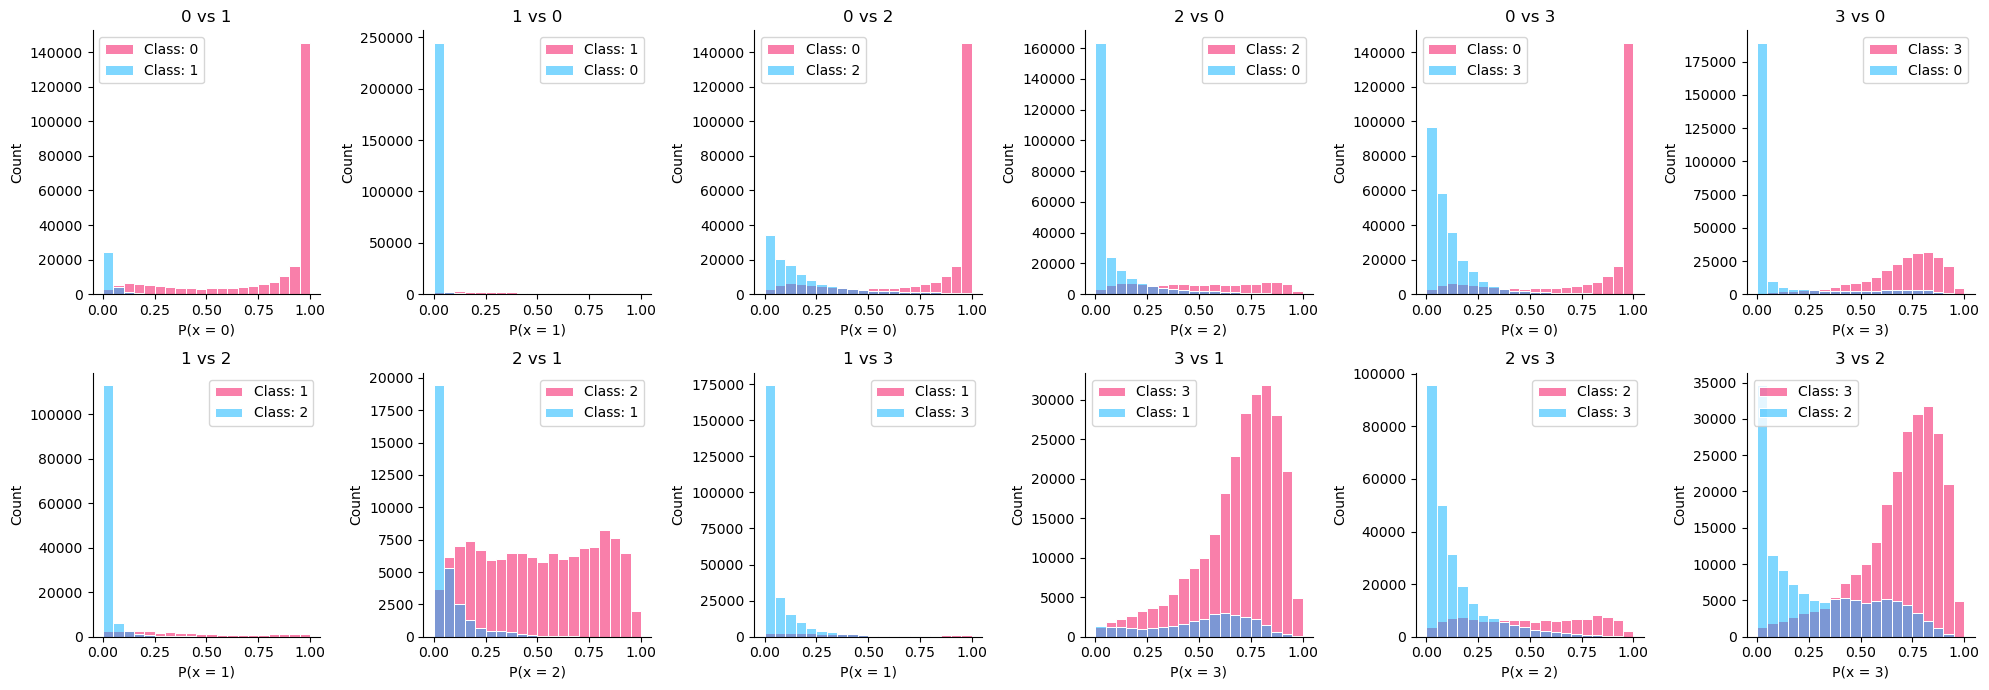

 60%|██████    | 3/5 [09:40<06:14, 187.23s/it]/opt/conda/envs/wind_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 0it [00:00, ?it/s]

MLP results:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89    249306
           1       0.53      0.74      0.62     31174
           2       0.71      0.76      0.73    124554
           3       0.80      0.81      0.80    249306

    accuracy                           0.81    654340
   macro avg       0.74      0.79      0.76    654340
weighted avg       0.82      0.81      0.81    654340



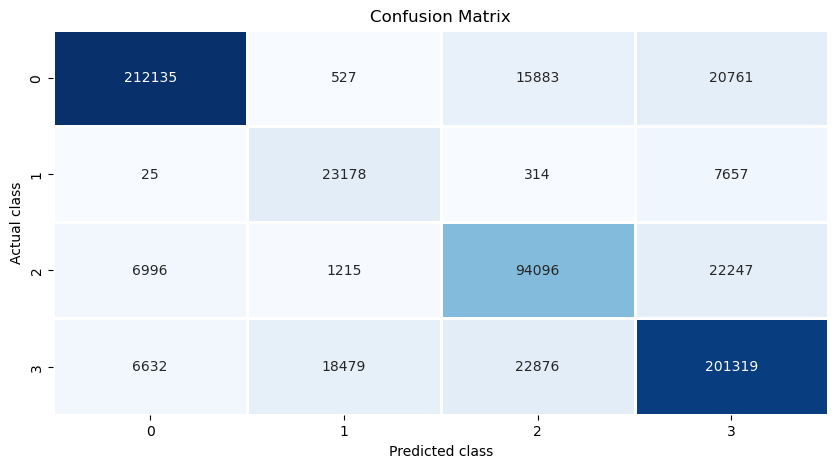

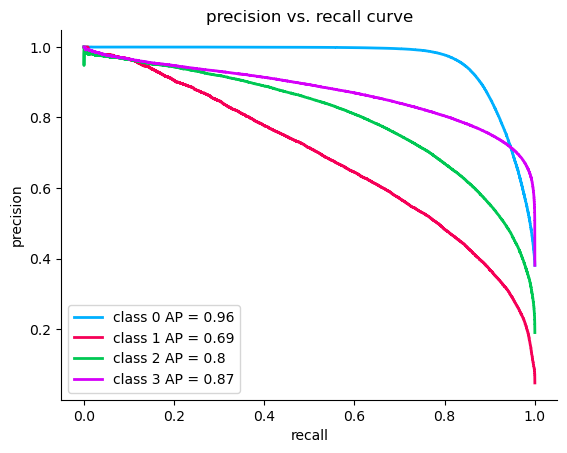

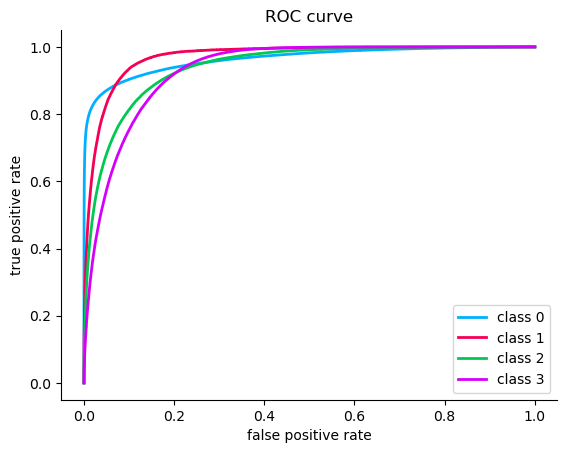

0 ROC AUC OvR: 0.9641
1 ROC AUC OvR: 0.9708
2 ROC AUC OvR: 0.9402
3 ROC AUC OvR: 0.9319
average ROC AUC OvR: 0.9518


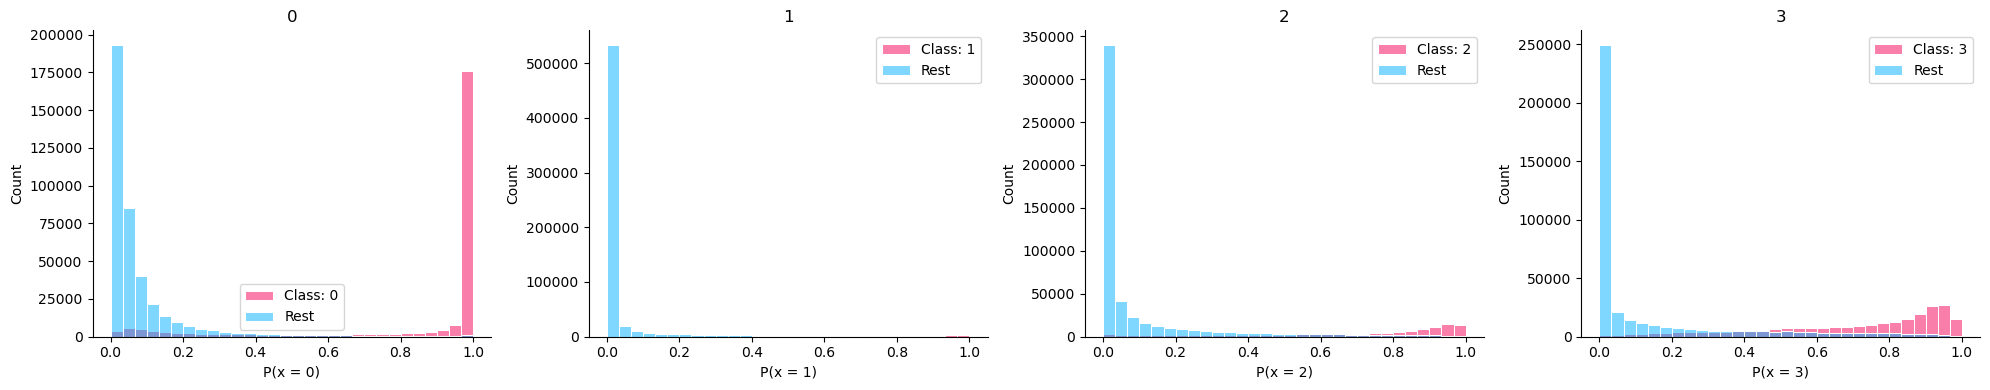

0 vs 1 ROC AUC OvO: 0.9945
1 vs 0 ROC AUC OvO: 0.9965
0 vs 2 ROC AUC OvO: 0.9563
2 vs 0 ROC AUC OvO: 0.9546
0 vs 3 ROC AUC OvO: 0.9641
3 vs 0 ROC AUC OvO: 0.9538
1 vs 2 ROC AUC OvO: 0.9858
2 vs 1 ROC AUC OvO: 0.9763
1 vs 3 ROC AUC OvO: 0.9376
3 vs 1 ROC AUC OvO: 0.8617
2 vs 3 ROC AUC OvO: 0.9213
3 vs 2 ROC AUC OvO: 0.9058
average ROC AUC OvO: 0.9507


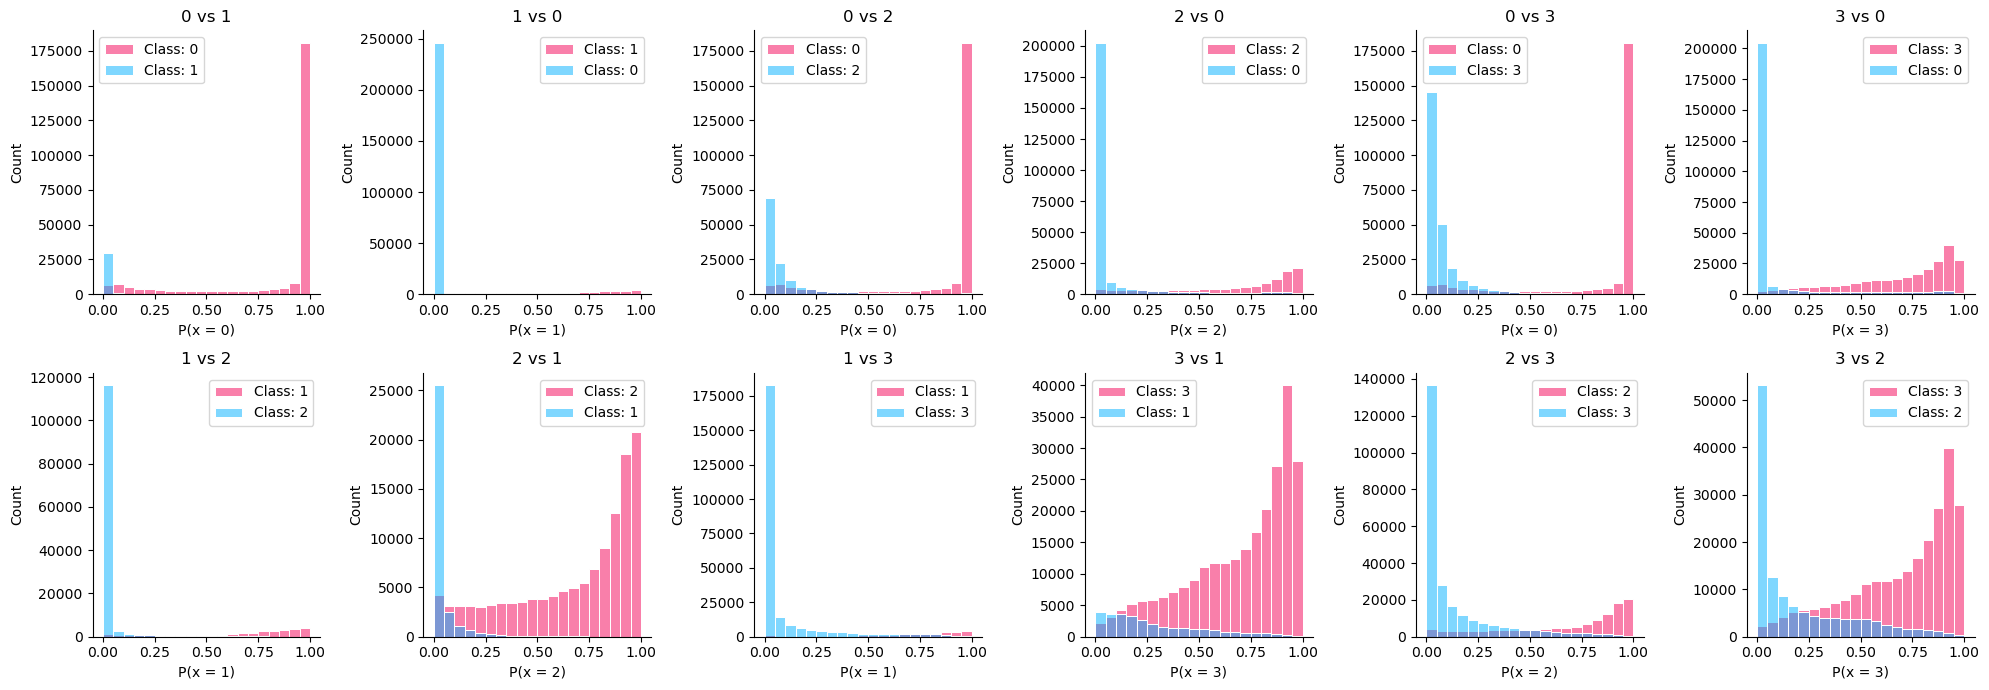

 80%|████████  | 4/5 [10:03<02:02, 122.49s/it]/opt/conda/envs/wind_env/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Predicting: 0it [00:00, ?it/s]

lstm_nn results:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89    249306
           1       0.73      0.41      0.53     31174
           2       0.75      0.66      0.70    124554
           3       0.76      0.88      0.81    249306

    accuracy                           0.81    654340
   macro avg       0.79      0.70      0.73    654340
weighted avg       0.81      0.81      0.81    654340



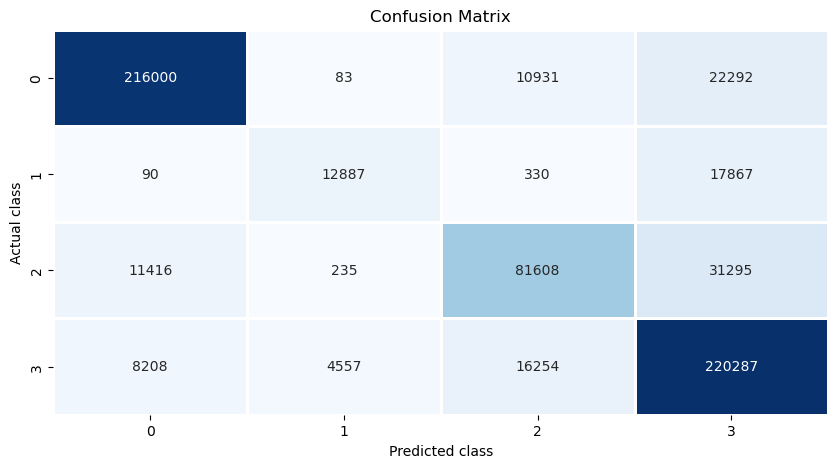

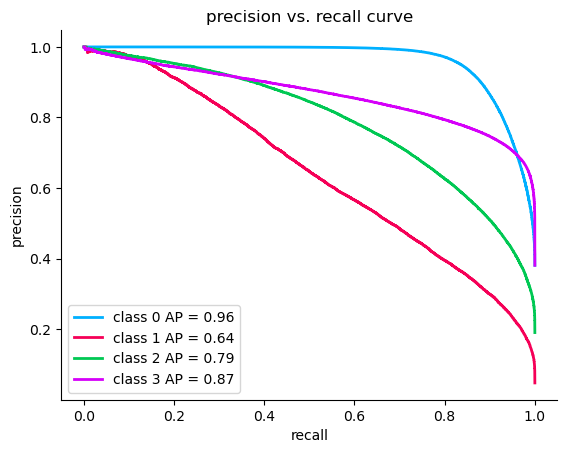

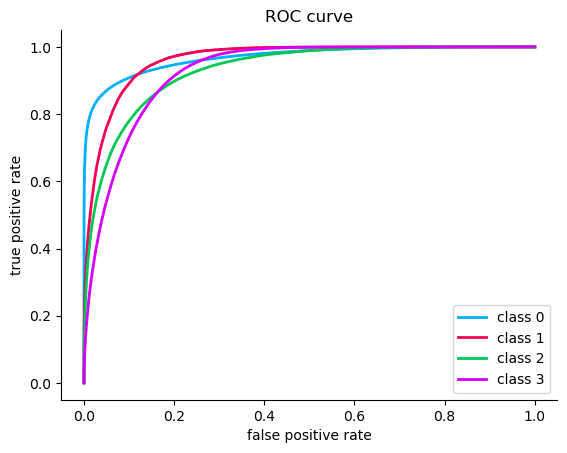

0 ROC AUC OvR: 0.9685
1 ROC AUC OvR: 0.9627
2 ROC AUC OvR: 0.9316
3 ROC AUC OvR: 0.9275
average ROC AUC OvR: 0.9476


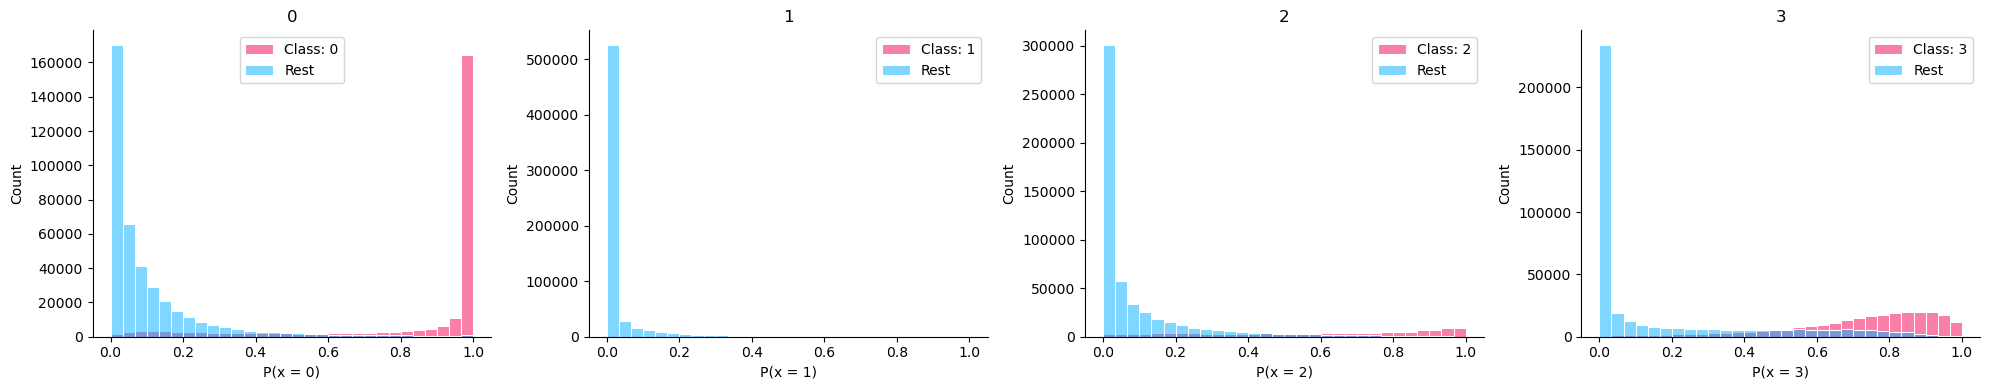

0 vs 1 ROC AUC OvO: 0.9938
1 vs 0 ROC AUC OvO: 0.9966
0 vs 2 ROC AUC OvO: 0.9559
2 vs 0 ROC AUC OvO: 0.9516
0 vs 3 ROC AUC OvO: 0.9717
3 vs 0 ROC AUC OvO: 0.9602
1 vs 2 ROC AUC OvO: 0.9819
2 vs 1 ROC AUC OvO: 0.9634
1 vs 3 ROC AUC OvO: 0.9192
3 vs 1 ROC AUC OvO: 0.7716
2 vs 3 ROC AUC OvO: 0.9076
3 vs 2 ROC AUC OvO: 0.9010
average ROC AUC OvO: 0.9395


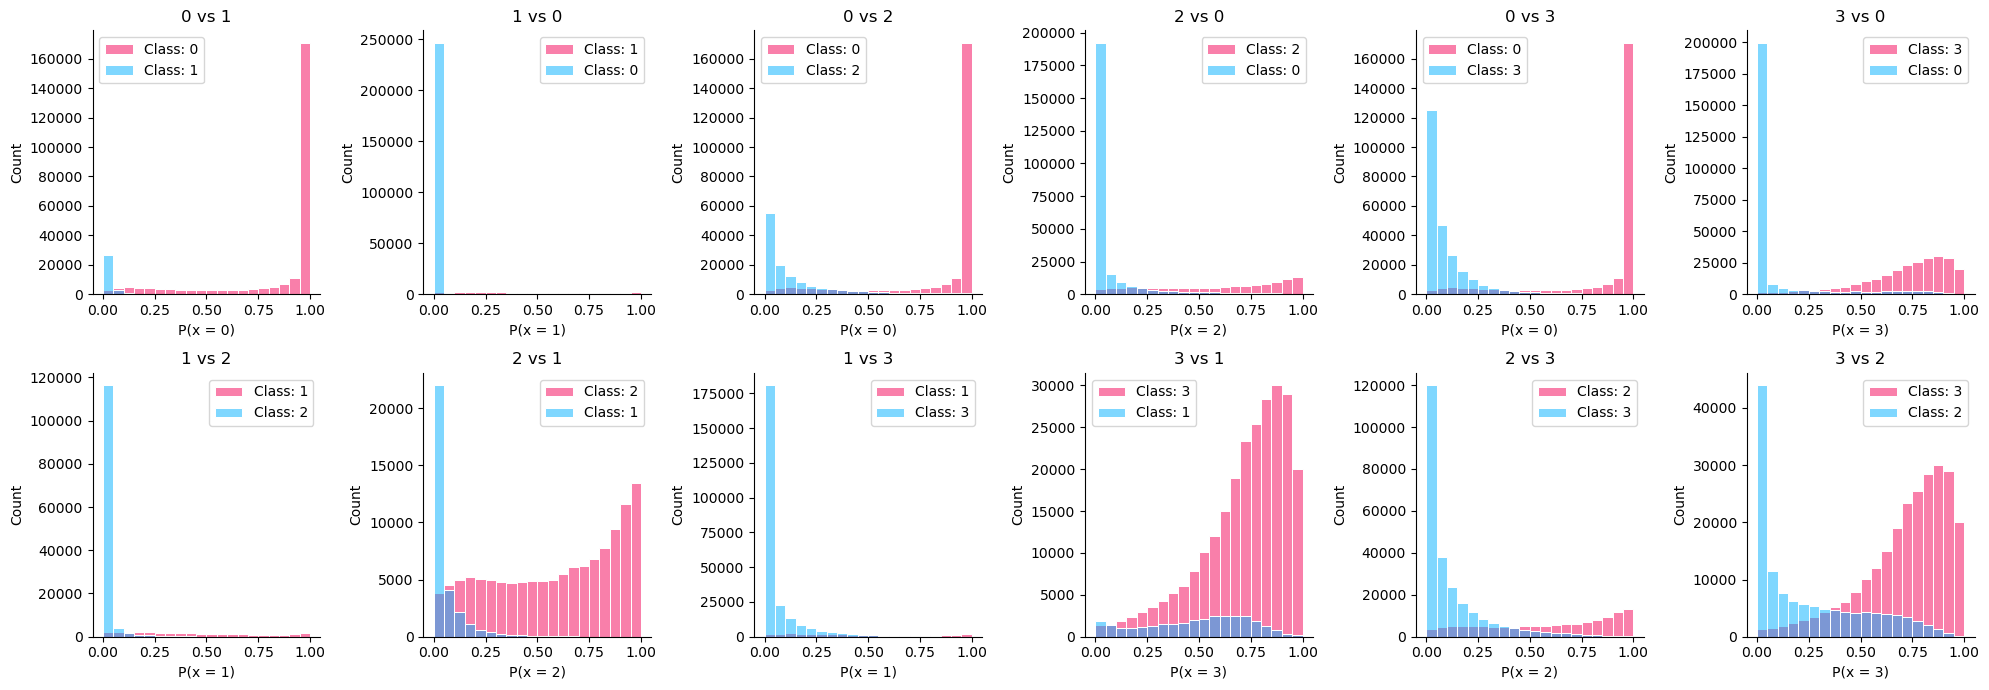

100%|██████████| 5/5 [10:27<00:00, 125.54s/it]


In [13]:
y_probs = dict()
softmax = nn.Softmax(dim=1)
joint_dict = {**clf_dict, **clf_nn_dict}

for model in tqdm(joint_dict):
    if model == "MLP":
        network = Crop_MLP()
        checkpoint = torch.load(clf_nn_dict["MLP"])
        loaded_model = Crop_PL(net=network)
        loaded_model.load_state_dict(checkpoint["state_dict"])
        loaded_model.eval()

        # create an instance of pl.Trainer
        trainer = pl.Trainer(gpus=1)

        # check metrics
        predictions = torch.cat(
            trainer.predict(loaded_model, DataLoader(X_test_t, batch_size=2048)), dim=0
        )
        softmax = nn.Softmax(dim=1)
        y_prob = softmax(predictions.float()).numpy()
        y_pred = np.argmax(y_prob, 1)
        y_probs[model] = y_prob
    elif model == "lstm":
        network = Crop_LSTM()
        checkpoint = torch.load(clf_nn_dict["lstm"])
        loaded_model = Crop_PL(net=network)
        loaded_model.load_state_dict(checkpoint["state_dict"])
        loaded_model.eval()

        # create an instance of pl.Trainer
        trainer = pl.Trainer(gpus=1)

        # check metrics
        predictions = torch.cat(
            trainer.predict(loaded_model, DataLoader(X_lstm, batch_size=2048)), dim=0
        )
        softmax = nn.Softmax(dim=1)
        y_prob = softmax(predictions.float()).numpy()
        y_pred = np.argmax(y_prob, 1)
        y_probs[model] = y_prob
    else:
        # loading the models:
        loaded_model = pickle.load(open(joint_dict[model], "rb"))
        y_pred = loaded_model.predict(X_test)
        y_prob = loaded_model.predict_proba(X_test)
        y_probs[model] = y_prob

    print(model + " results:")
    custom_multiclass_report(y_test, y_pred, y_probs[model])

Mean models results:
              precision    recall  f1-score   support

           0       0.92      0.86      0.89    249306
           1       0.75      0.42      0.54     31174
           2       0.75      0.67      0.71    124554
           3       0.76      0.89      0.82    249306

    accuracy                           0.82    654340
   macro avg       0.80      0.71      0.74    654340
weighted avg       0.82      0.82      0.81    654340



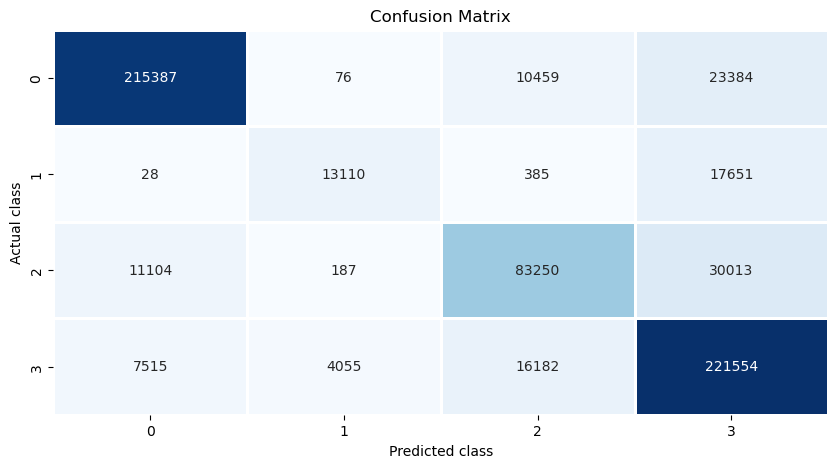

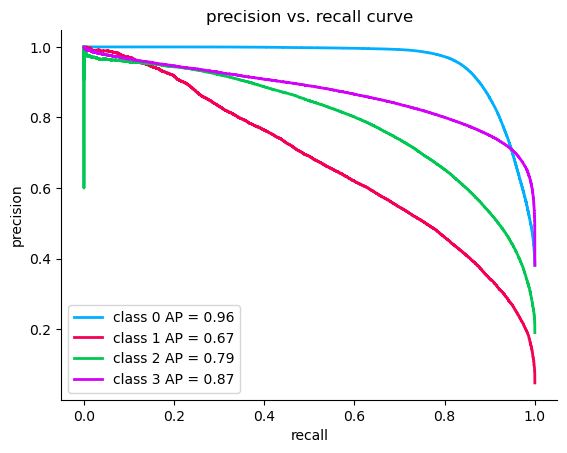

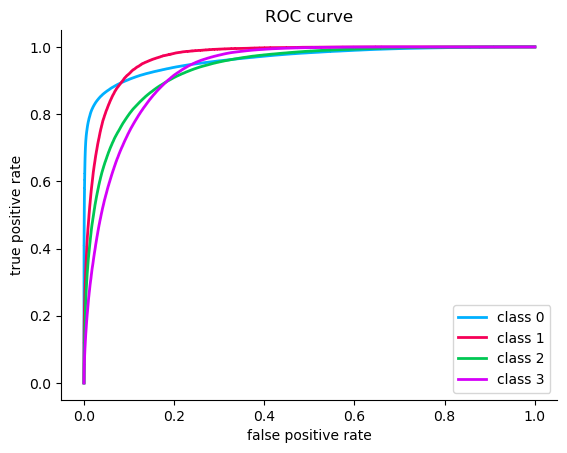

0 ROC AUC OvR: 0.9639
1 ROC AUC OvR: 0.9688
2 ROC AUC OvR: 0.9350
3 ROC AUC OvR: 0.9298
average ROC AUC OvR: 0.9494


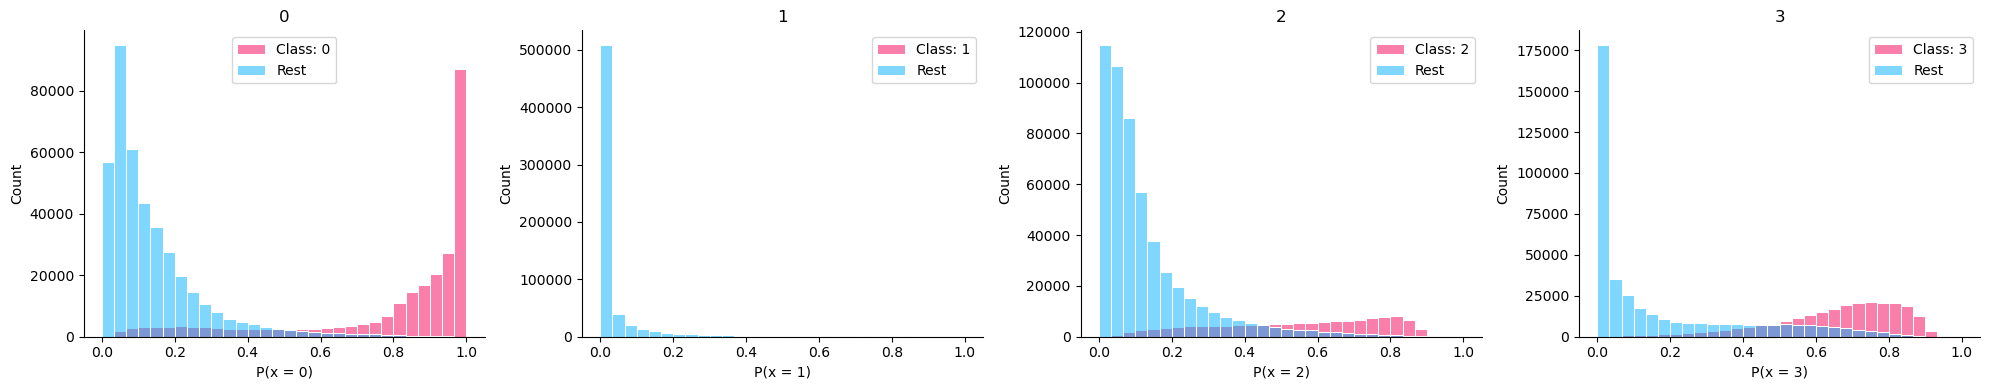

0 vs 1 ROC AUC OvO: 0.9934
1 vs 0 ROC AUC OvO: 0.9966
0 vs 2 ROC AUC OvO: 0.9450
2 vs 0 ROC AUC OvO: 0.9505
0 vs 3 ROC AUC OvO: 0.9697
3 vs 0 ROC AUC OvO: 0.9576
1 vs 2 ROC AUC OvO: 0.9852
2 vs 1 ROC AUC OvO: 0.9681
1 vs 3 ROC AUC OvO: 0.9328
3 vs 1 ROC AUC OvO: 0.7970
2 vs 3 ROC AUC OvO: 0.9153
3 vs 2 ROC AUC OvO: 0.9073
average ROC AUC OvO: 0.9432


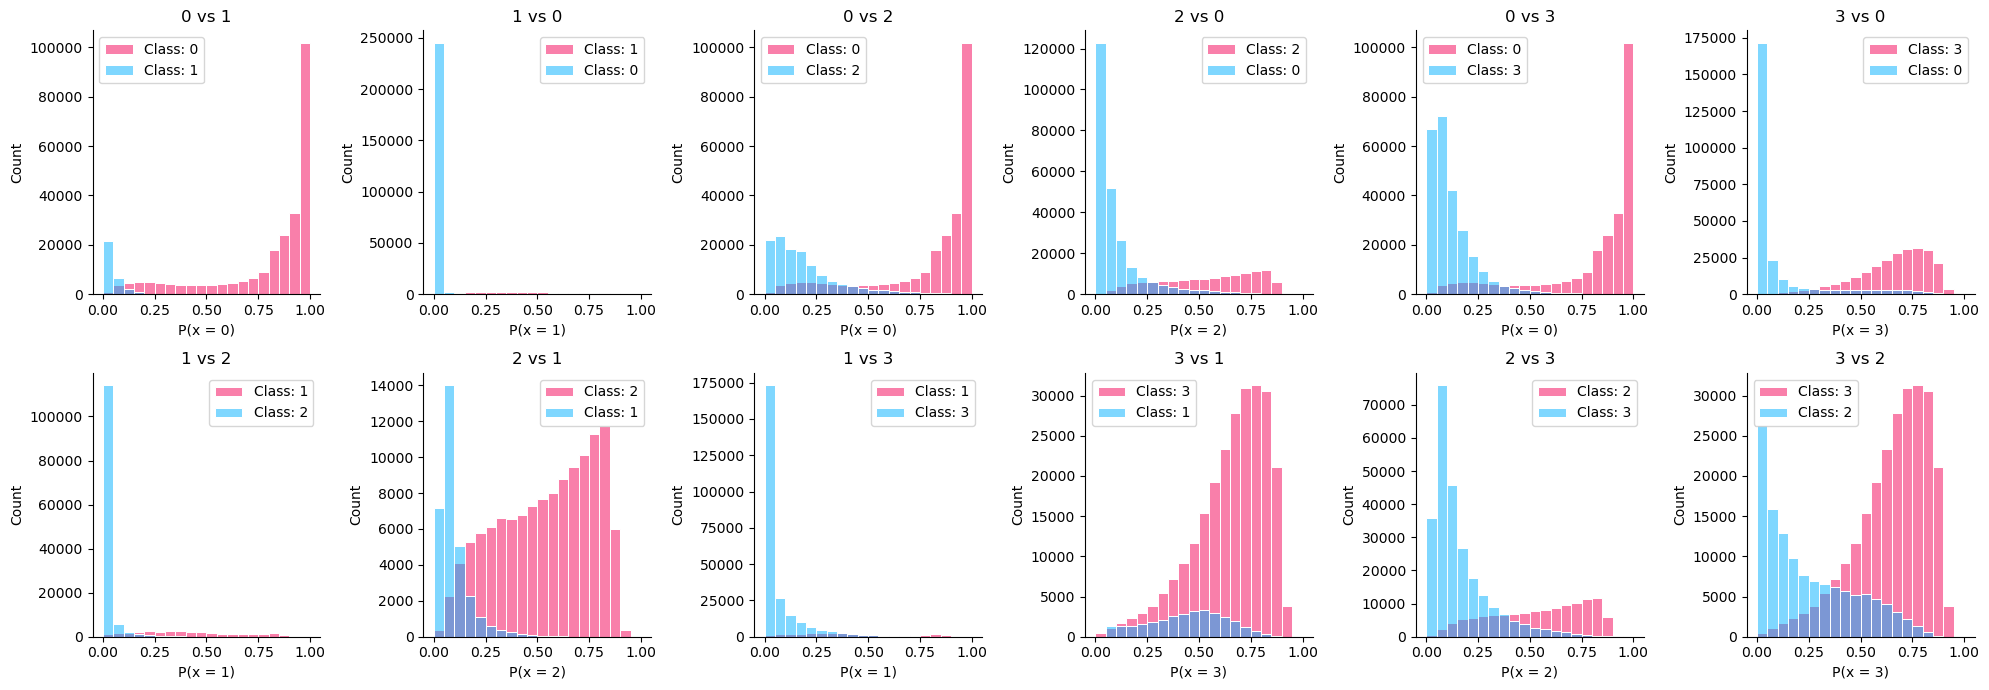

In [14]:
# Mean probabilities

mean_y_prob = np.divide(sum(y_probs.values()), len(y_probs.keys()))
mean_y_pred = [np.argmax(i) for i in mean_y_prob]


print("Mean models results:")
custom_multiclass_report(y_test, mean_y_pred, mean_y_prob)

Mean models results:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90    249306
           1       0.64      0.61      0.62     31174
           2       0.74      0.72      0.73    124554
           3       0.78      0.86      0.82    249306

    accuracy                           0.82    654340
   macro avg       0.77      0.76      0.77    654340
weighted avg       0.83      0.82      0.82    654340



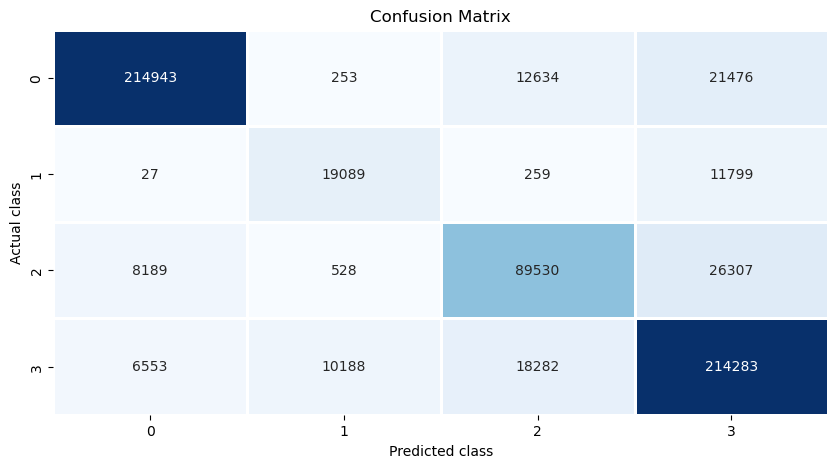

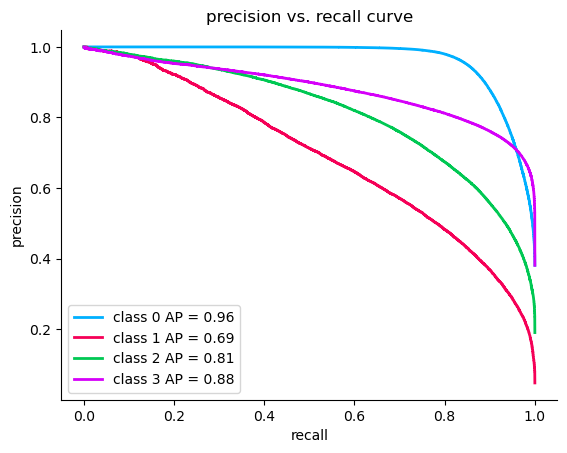

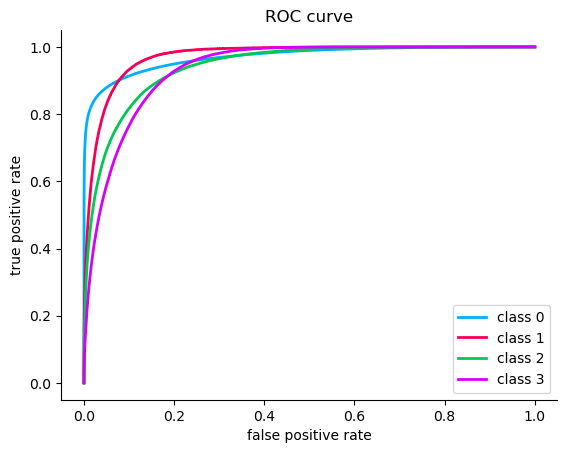

0 ROC AUC OvR: 0.9703
1 ROC AUC OvR: 0.9717
2 ROC AUC OvR: 0.9426
3 ROC AUC OvR: 0.9352
average ROC AUC OvR: 0.9549


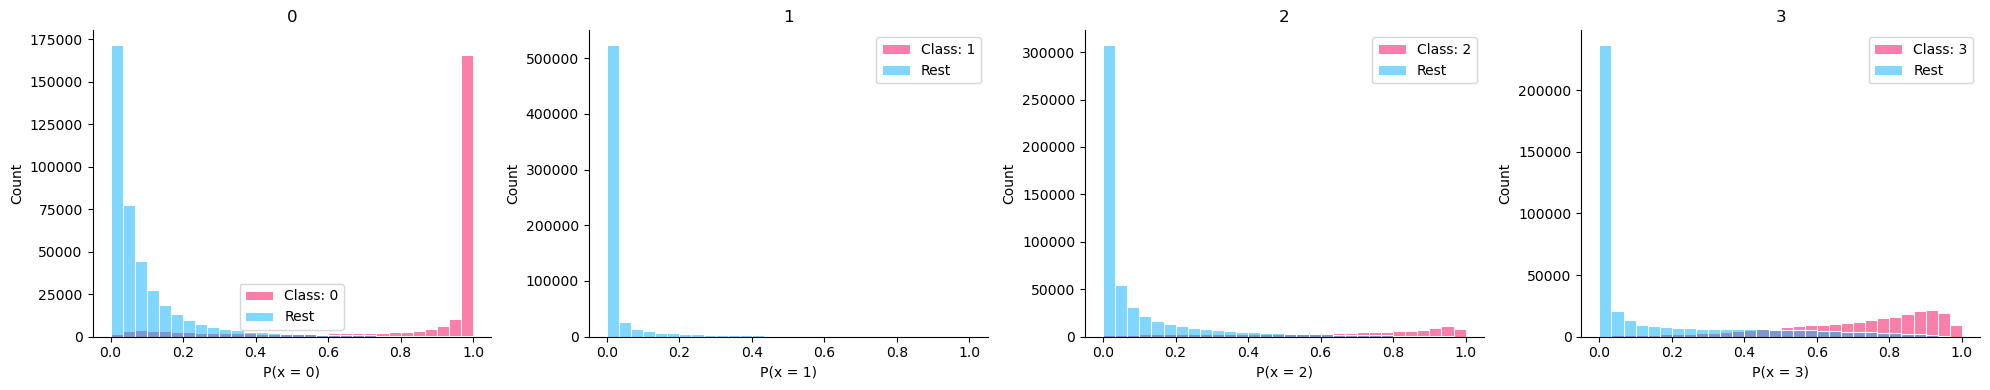

0 vs 1 ROC AUC OvO: 0.9955
1 vs 0 ROC AUC OvO: 0.9974
0 vs 2 ROC AUC OvO: 0.9601
2 vs 0 ROC AUC OvO: 0.9575
0 vs 3 ROC AUC OvO: 0.9722
3 vs 0 ROC AUC OvO: 0.9590
1 vs 2 ROC AUC OvO: 0.9876
2 vs 1 ROC AUC OvO: 0.9769
1 vs 3 ROC AUC OvO: 0.9380
3 vs 1 ROC AUC OvO: 0.8388
2 vs 3 ROC AUC OvO: 0.9234
3 vs 2 ROC AUC OvO: 0.9116
average ROC AUC OvO: 0.9515


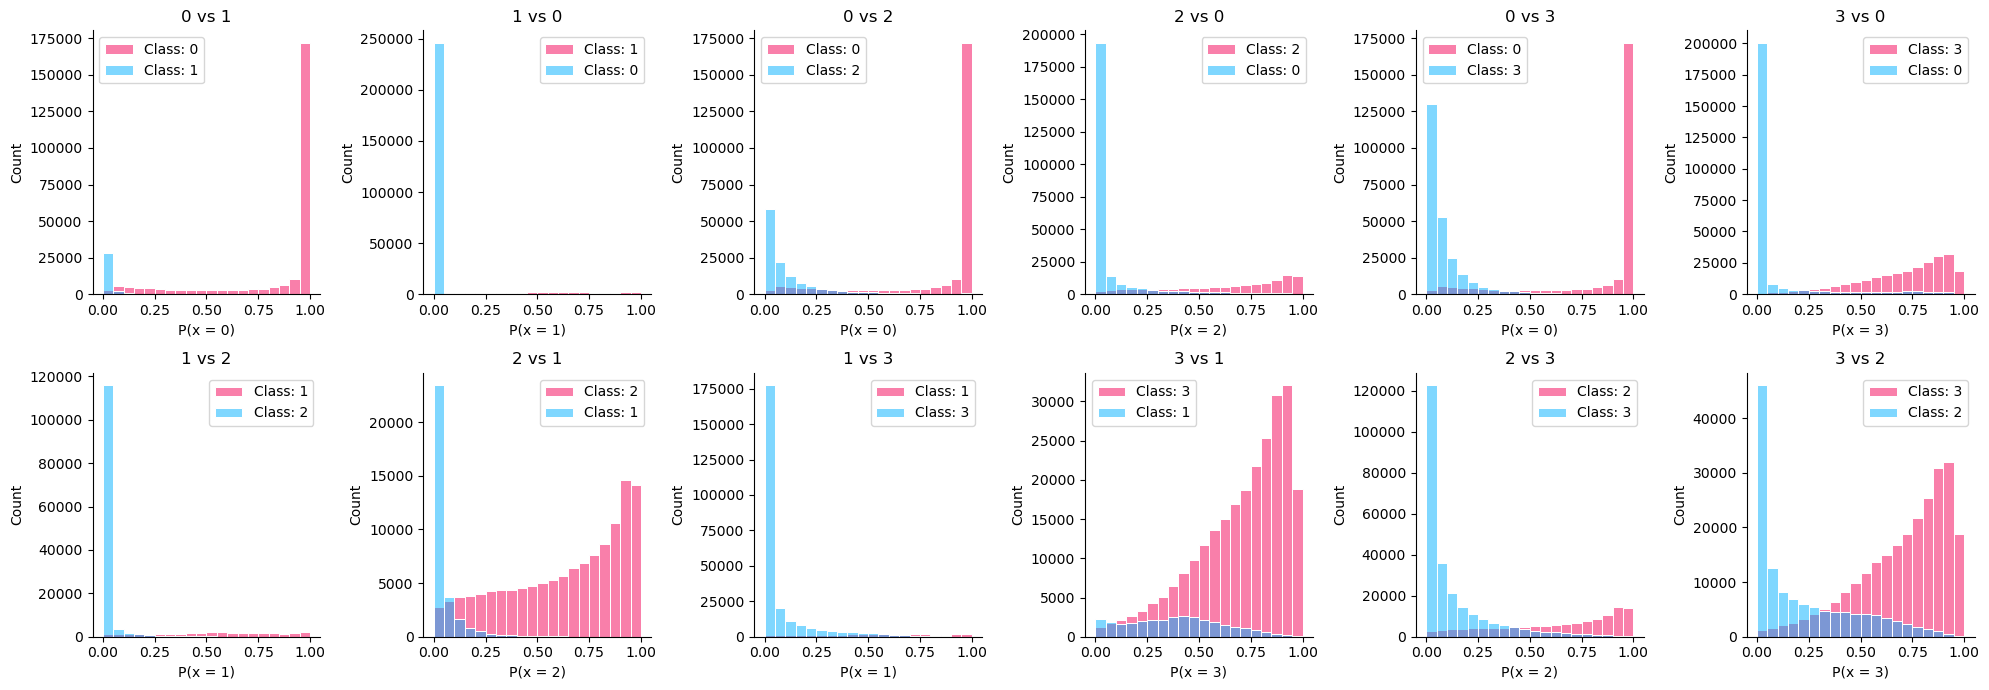

In [15]:
# Mean probabilities for nn

y_probs_nn = {key: y_probs[key] for key in y_probs.keys() if key in ["MLP", "lstm"]}

mean_nn_y_prob = np.divide(sum(y_probs_nn.values()), len(y_probs_nn.keys()))
mean_nn_y_pred = [np.argmax(i) for i in mean_nn_y_prob]


print("Mean models results:")
custom_multiclass_report(y_test, mean_nn_y_pred, mean_nn_y_prob)

              precision    recall  f1-score   support

           0       0.89      0.87      0.88    249306
           1       0.65      0.58      0.61     31174
           2       0.75      0.67      0.71    124554
           3       0.78      0.85      0.81    249306

    accuracy                           0.81    654340
   macro avg       0.77      0.74      0.75    654340
weighted avg       0.81      0.81      0.81    654340



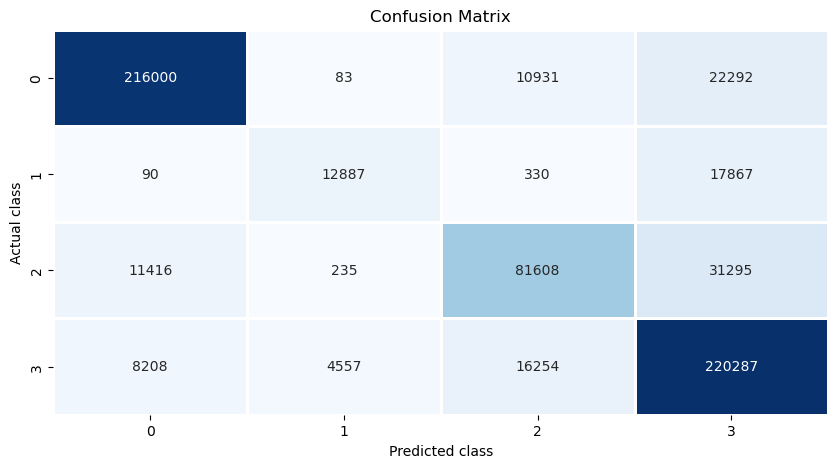

In [17]:
# Max prob predictions

# Predict on test set
y_prob_joint = np.concatenate([y_probs[x] for x in y_probs], 1)
y_pred_maxprob = [np.argmax(values) % 4 for values in y_prob_joint]
# -----------------------------------------------------
# Printing metrics
print(classification_report(y_test, y_pred_maxprob))
# -----------------------------------------------------
#  # Plot confusion matrix
plt.figure(figsize=(10, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(
    cm,
    annot=True,
    xticklabels=[0, 1, 2, 3],
    yticklabels=[0, 1, 2, 3],
    cbar=False,
    fmt="d",
    linewidths=1,
    cmap="Blues",
)
plt.title("Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.show()
# -----------------------------------------------------